In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
%matplotlib inline
df = pandas.read_csv('data1.csv', header=None)
experiment = list(df.iloc[0])

### 4.1
$$
\begin{aligned} \ell(\theta) &=\log \theta \sum_{i=1}^{n} x_{i}+\log (1-\theta) \sum_{i=1}^{n}\left(1-x_{i}\right) \\ \frac{\partial \ell(\theta)}{\partial \theta} &=\frac{\sum_{i=1}^{n} x_{i}}{\theta}-\frac{\sum_{i=1}^{n}\left(1-x_{i}\right)}{1-\theta} {=} 0 \\ \sum_{i=1}^{n} x_{i}-\theta \sum_{i=1}^{n} x_{i} &=\theta \sum_{i=1}^{n}\left(1-x_{i}\right) \\
\theta^{MLE}&=\frac{1}{n} \sum_{i=1}^{n} x_{i}
\end{aligned}
$$

MLE estimator of theta =  0.61


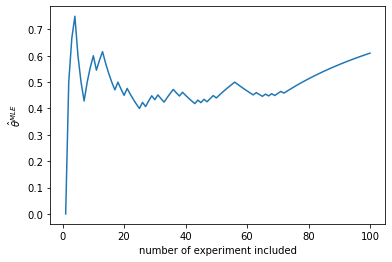

In [4]:
def computeMLE(toss):
    return np.mean(toss)
print("MLE estimator of theta = ", computeMLE(experiment))
mles = []
n = len(experiment)
x = list(range(1, n+1))

for i in range(1, n+1):
    mles.append(computeMLE(experiment[:i]))
# print(mles)
plt.plot(x, mles)
plt.xlabel('number of experiment included')
plt.ylabel(r'$\hat \theta^{MLE}$')
plt.show()

The estimator don't seems to converge as more data are used. All experiments after trial ~80 take value of a Head. The fairness of the coin could be compromised in the experiment.

### 4.2
$$
\begin{aligned} 
0 &= \frac{\partial}{\partial \theta} l \\ 
&= \frac{\partial}{\partial \theta} l^{MLE} + \frac{\partial}{\partial \theta} \log \operatorname{Beta}(\theta \mid \beta_0, \beta_1) \\
&=\frac{1}{\theta} \sum_{i=1}^{n} x_{i}-\frac{1}{1-\theta} \sum_{i=1}^{n}\left(1-x_{i}\right)+\frac{\beta_0-1}{\theta}-\frac{\beta_1-1}{1-\theta} \\
\theta^{MAP} &= \frac{\sum_i x_i + \beta_0 - 1}{n + \beta_1 + \beta_0 - 2}
 \end{aligned}
$$


expected value of theta for a coin from M_A =  0.5025
expected value of theta for a coin from M_B =  0.5555555555555556


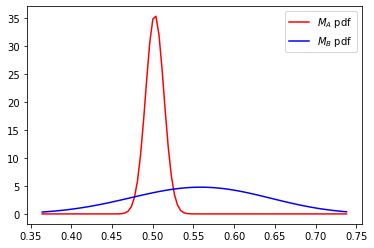

Assume the coin from M_A, MAP estimator of theta =  0.5076263107721639
Assume the coin from M_B, MAP estimator of theta =  0.5970149253731343


In [5]:
beta_0A, beta_1A = 1005, 995
beta_0B, beta_1B = 20, 16
mean_A, _, _, _ = beta.stats(beta_0A, beta_1A, moments='mvsk')
mean_B, _, _, _ = beta.stats(beta_0B, beta_1B, moments='mvsk')
print("expected value of theta for a coin from M_A = ", mean_A)
print("expected value of theta for a coin from M_B = ", mean_B)
expectation = lambda a, b: a / (a + b)
# print(expectation(beta_0A, beta_1A), expectation(beta_0B, beta_1B))

x = np.linspace(beta.ppf(0.01, beta_0B, beta_1B),
                beta.ppf(0.99, beta_0B, beta_1B), 100)
plt.plot(x, beta.pdf(x, beta_0A, beta_1A),
       'r-', label='$M_A$ pdf')
plt.plot(x, beta.pdf(x, beta_0B, beta_1B),
       'b-', label='$M_B$ pdf')
plt.legend()
plt.show()


def computeMAP(toss, beta_0, beta_1):
    n = len(toss)
    return (toss.count(1) + beta_0 - 1) / (n + beta_1 + beta_0 - 2)


print("Assume the coin from M_A, MAP estimator of theta = ", computeMAP(experiment, beta_0A, beta_1A))
print("Assume the coin from M_B, MAP estimator of theta = ", computeMAP(experiment, beta_0B, beta_1B))